In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# uncomment to force package installation
# github_project("QuantEcon/quantecon-notebooks-julia", version="0.5.0", instantiate=true)
using LinearAlgebra, Statistics

Activated /Users/yurimatsumura/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.5.0


In [2]:
a = [1.0, 2.0, 3.0]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

In [4]:
ndims(a)

1

In [9]:
x = [1, 2, 3]
y = similar(x)
y

3-element Array{Int64,1}:
 4488115712
 4484335280
 4481504624

In [11]:
d = [10, 20]
a = Diagonal(d)

a - I 

2×2 Diagonal{Int64,Array{Int64,1}}:
 9   ⋅
 ⋅  19

In [133]:
# Exercise 1 

using LinearAlgebra

function unconditional_var(A, Σ, tolerance, maxiter)
    S_old = zeros(2, 2)
    normdiff = Inf
    iter = 1
    while normdiff > tolerance  && iter ≤ maxiter
        S_new = A * S_old * A' + Σ * Σ'
        normdiff = norm(S_new - S_old)
        S_old = S_new
        iter += 1
    end
    return S_old
end


A = [0.8 -0.2; -0.1 0.7]
Σ = [0.5 0.4; 0.4 0.6]
tolerance = 1E-7 
maxiter = 1000


sol = unconditional_variance(A, Σ, tolerance, maxiter)



2×2 Array{Float64,2}:
 0.671231  0.633474
 0.633474  0.858874

In [7]:
# Exercise 2 

using LinearAlgebra, Plots, Statistics

N = 200
T = 150
final_y_T = zeros(3, N)

for n in 1: N - 1
    θ = [0.8, 0.9, 0.98] 
    y_n = zeros(3 , T + 1)
    roll_mean = zeros(3 , T + 1)
    γ = ones(3)
    σ = 1 
    for t in 1:T
        w = randn(3)
        y_n[1:3, t + 1] = γ .+ θ.* y_n[1:3, t] .+ σ.* w
    end 

    for τ in 1:T
        roll_mean[1:3, 1] = y_n[1:3, 1]
        roll_mean[1:3, τ + 1] = (y_n[1:3, τ + 1] .+ roll_mean[1:3, τ])./τ 
    end 
    final_y_T[1:3, n] = y_n[1:3, T] 
end 

histogram()


#plot(y_n[1,1:T])
#plot!(y_n[2,1:T])
#plot!(y_n[3,1:T])

#plot(roll_mean[1,1:T])
#plot!(roll_mean[2,1:T])
#plot!(roll_mean[3,1:T])


h =  histogram(final_y_T[1,1:N])
histogram!(h,final_y_T[1,1:N])
histogram!(h,final_y_T[1,1:N])



mean(final_y_T[1,1:N])


5.07409938871474

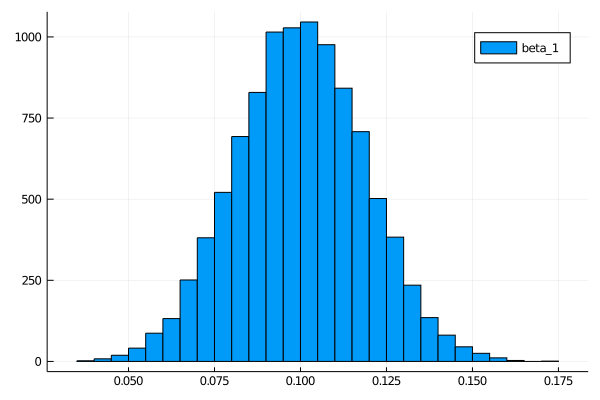

In [5]:
# Exercise 3

using LinearAlgebra, Plots, Statistics

function histogram_beta(M,N,a,b,c,d,σ)
    beta = zeros(2,M)
    for m in 1:M 
        x = randn(N,2)
        y = zeros(N)
        for n in 1:N 
            y[n] = 0.1 * x[n,1] + 0.1 * x[n,1]^2 + 0.5 * x[n,2] + 1.0 + 0.1 *randn()
        end 
      
        beta[1:2,m] = (x' * x)\ (x'*y)
    end
    return plot(histogram(beta[1,1:M], label = "beta_1"))#, histogram(beta[2,1:M],label = "beta_2"))
end 

histogram_beta(10000,5000,0.1,0.2,0.5,1.0,0.1)

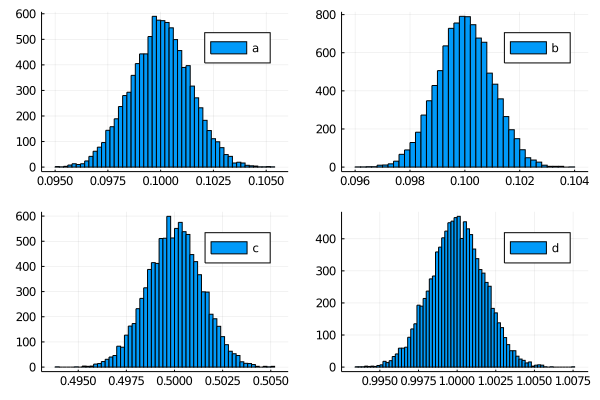

In [16]:
# Exercise 3 var2


using LinearAlgebra, Plots, Statistics

function histogram_beta(M,N,a,b,c,d,σ)
    beta = zeros(4,M)
    for m in 1:M 
        x_1, x_2 = randn(N), randn(N)
        y = 0.1 .* x_1 .+ 0.1 .* x_1.^2 .+ 0.5 .* x_2 .+ 1.0 .+ 0.1 .*randn(N)
        x = [x_1 x_1.^2 x_2 ones(N)]
        beta[1:4,m] = (x' * x)\ (x'*y)
    end
    return plot(histogram(beta[1,:], label = "a"),
        histogram(beta[2,:],label = "b"),
        histogram(beta[3,:],label = "c"),
        histogram(beta[4,:],label = "d"))
end 

histogram_beta(10000,5000,0.1,0.2,0.5,1.0,0.1)

In [18]:

# Exercise 4

using NLsolve




A = [0.8 -0.2; -0.1 0.7]
Σ = [0.5 0.4; 0.4 0.6]
s_0 = reshape(Σ * Σ',4)
f(S) = reshape(A * reshape(s_0,2,2) * A' + Σ * Σ',4)



sol = fixedpoint(f,s_0)
println("$(sol.iterations) iterations")

2 iterations
